In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv("full_top_2000_audio_features.csv", header=0, index_col=[0])


def data_dict_generator():
    #Initialize empty dict
    data_dict = {}
    for i in range(1999, 2019):
        #Subset dataframe; for example only take rows where pos1999 is not 0 (So song is in top 2000 of 1999)
        sub_df = df[df[f'pos{i}'] != 0]
        #Calculate means, add as dictionary.

        data_dict[f'pos{i}'] = {'acousticness' : sub_df['acousticness'].mean(),
                                'danceability':sub_df['danceability'].mean(),
                                'duration_ms':sub_df['duration_ms'].mean(),
                                'energy':sub_df['energy'].mean(),
                                'instrumentalness':sub_df['instrumentalness'].mean(),
                                'loudness':sub_df['loudness'].mean(),
                                'speechiness':sub_df['speechiness'].mean(),
                                'valence':sub_df['valence'].mean() }
    #Nested dict
    return data_dict

average_data = data_dict_generator()


def data_plotter(internal_feature):
    year_range = np.arange(1999, 2019, dtype=np.int)
    
    track_feat_list = []
    for i in range(1999, 2019):
        track_feat_list.append(average_data[f'pos{i}'][f'{internal_feature}'])
    plt.plot(year_range, track_feat_list, '-o')
    plt.title(f'{internal_feature} in top2000 over the years')
    plt.xscale('linear')
    plt.xlabel("Year")
    plt.ylabel(f"{internal_feature}")
    plt.xscale("linear")
    plt.xticks(np.arange(1999, 2019, step=2))
    plt.show()

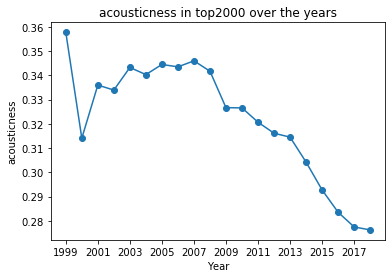

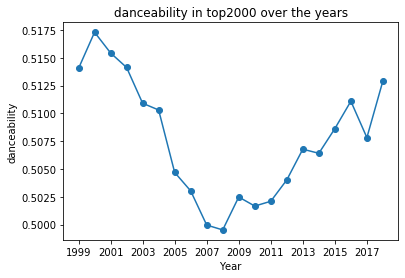

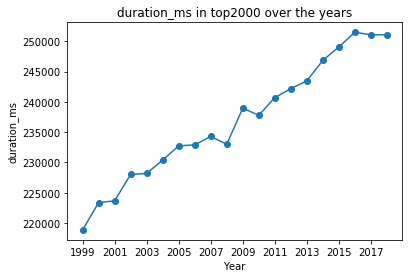

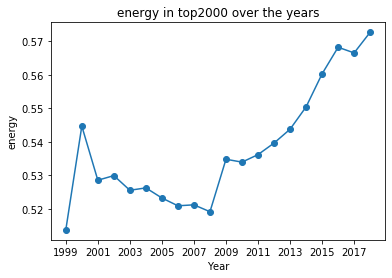

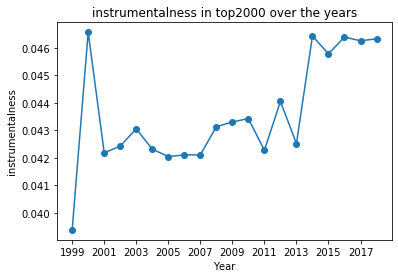

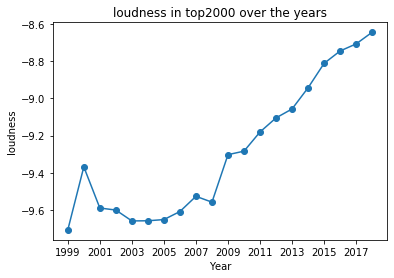

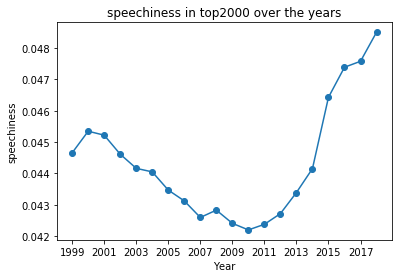

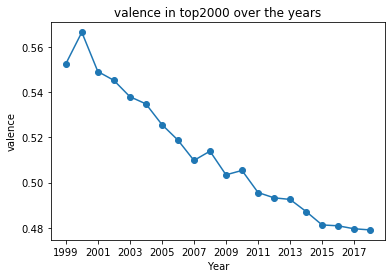

In [7]:
for track_feat in average_data['pos1999']:
    data_plotter(track_feat)

# plot a colorized grid of these graphs
source: https://python-graph-gallery.com/125-small-multiples-for-line-chart/

In [51]:
track_feat_list = []
for i in range(1999, 2019):
    track_feat_list.append(average_data[f'pos{i}']['speechiness'])
    
track_feat_list = np.array(track_feat_list)
track_feat_list = scaler.fit_transform(track_feat_list.reshape(-1,1))
track_feat_list

array([[ 0.16202526],
       [ 0.53958192],
       [ 0.47027332],
       [ 0.13837494],
       [-0.1084206 ],
       [-0.17036584],
       [-0.48792073],
       [-0.67641164],
       [-0.96533432],
       [-0.83736525],
       [-1.06770957],
       [-1.18278593],
       [-1.08503672],
       [-0.8981882 ],
       [-0.53062271],
       [-0.11351198],
       [ 1.13133278],
       [ 1.65582804],
       [ 1.7598183 ],
       [ 2.26643894]])

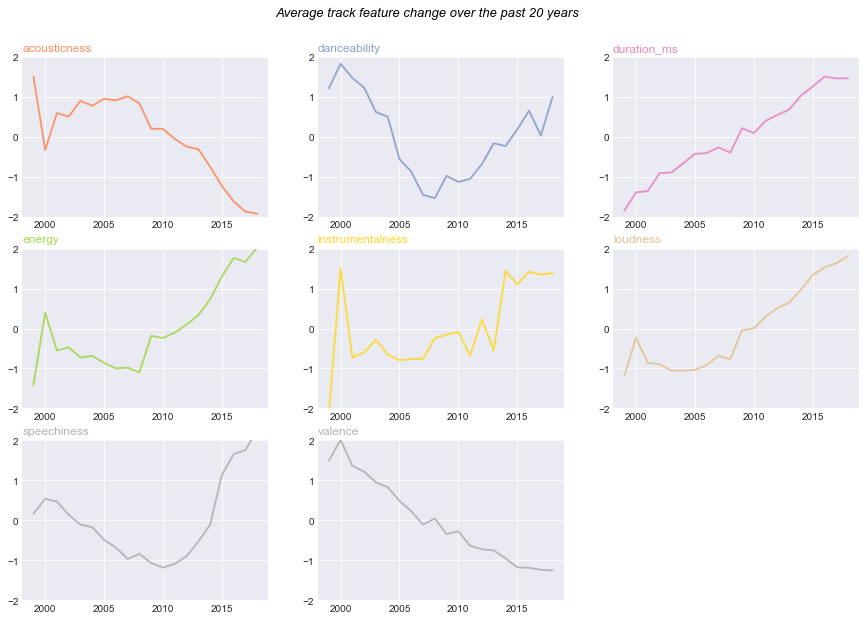

In [55]:
from sklearn import preprocessing

# Initialize the figure
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,10))
 
# create a color palette
palette = plt.get_cmap('Set2')

# Create a list with everything BUT the track features
drop_list = []
for feat in df.columns[:len(df.columns)-8]:
    drop_list.append(feat)

# Create a np array of the years
year_range = np.arange(1999, 2019, dtype=np.int)

# initialize a standardizer object
scaler = preprocessing.StandardScaler()

# multiple line plot
num=0
for column in df.drop(drop_list, axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # Create the corresponding track feature list & standardize
    track_feat_list = []
    for i in range(1999, 2019):
        track_feat_list.append(average_data[f'pos{i}'][f'{column}'])
    track_feat_list = np.array(track_feat_list)
    track_feat_list = scaler.fit_transform(track_feat_list.reshape(-1,1))
    
    
    # Plot the lineplot
    plt.plot(year_range, track_feat_list, marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)

    # Same limits for everybody!
    plt.ylim(-2,2)
#     plt.yscale('log')
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num))

# general title
plt.suptitle("Average track feature change over the past 20 years", fontsize=13, fontweight=0, color='black', style='italic', y=0.95)

# Axis title
# plt.text(0.5, 0.04, 'Year', ha='center', va='center')
# plt.text(0.06, 0.5, 'Feature value', ha='center', va='center', rotation='vertical')

plt.show()

# Function for making a radar plot
Source: https://matplotlib.org/3.1.0/gallery/specialty_plots/radar_chart.html 

This code hasn't been changed in order to work with the data

In [ ]:
for track_feat in average_data['pos1999']:
    print(track_feat)
    
df.describe()

Duration_ms and loudness need to be normalized in order to correctly fit in the radar plot

In [ ]:
from sklearn import preprocessing


In [ ]:
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

# Setup and fill the radar plot

In [ ]:
N = len(average_data['pos1999'])
theta = radar_factory(N, frame='polygon')

data = example_data()
spoke_labels = data.pop(0)

fig, axes = plt.subplots(figsize=(9, 9), nrows=2, ncols=2,
                         subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

colors = ['b', 'r', 'g', 'm', 'y']
# Plot the four cases from the example data on separate axes
for ax, (title, case_data) in zip(axes.flat, data):
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
    ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                 horizontalalignment='center', verticalalignment='center')
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25)
    ax.set_varlabels(spoke_labels)

# add legend relative to top-left plot
ax = axes[0, 0]
labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
legend = ax.legend(labels, loc=(0.9, .95),
                   labelspacing=0.1, fontsize='small')

fig.text(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',
         horizontalalignment='center', color='black', weight='bold',
         size='large')

plt.show()